# Linear Models: Optimization and Evaluation

This hands-on lab demonstrates comprehensive machine learning concepts for optimizing and evaluating linear models.

## Overview

In this notebook, we will explore:

### Part 1: Optimizing and Training Linear Models
1. **Understanding Gradient Descent Optimization** - How gradient descent works and its variants
2. **L1 and L2/ElasticNet Regularization** - Preventing overfitting with regularization techniques
3. **Support Vector Machines** - Linear and non-linear classification with SVMs
4. **k-Folds Cross Validation** - Robust model evaluation through cross-validation

### Part 2: Evaluating Models
5. **Metrics for Model Evaluation** - Comprehensive evaluation metrics
6. **Hyperparameter Tuning** - Grid search and randomized search
7. **Threshold Tuning** - Adjusting decision thresholds for business needs
8. **Class Imbalance** - Handling imbalanced datasets
9. **Advanced Metrics** - ROC-AUC, PR-AUC, and more

## Dataset

We'll use the **Breast Cancer Wisconsin** dataset, a real-world medical dataset available in scikit-learn. This dataset contains features computed from digitized images of breast mass and is used to predict whether the mass is malignant or benign.

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier, Ridge, Lasso, ElasticNet
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_recall_curve, auc,
    average_precision_score
)
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## Load and Explore the Dataset

Let's load the Breast Cancer Wisconsin dataset and explore its characteristics.

In [2]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print("Dataset Shape:", df.shape)
print("\nFeature Names:")
print(data.feature_names)
print("\nTarget Names:", data.target_names)
print("\nFirst few rows:")
df.head()

Dataset Shape: (569, 31)

Feature Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target Names: ['malignant' 'benign']

First few rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Dataset Information:
Total samples: 569
Number of features: 30

Class distribution:
target
1    357
0    212
Name: count, dtype: int64

Class balance:
target
1    0.627417
0    0.372583
Name: proportion, dtype: float64


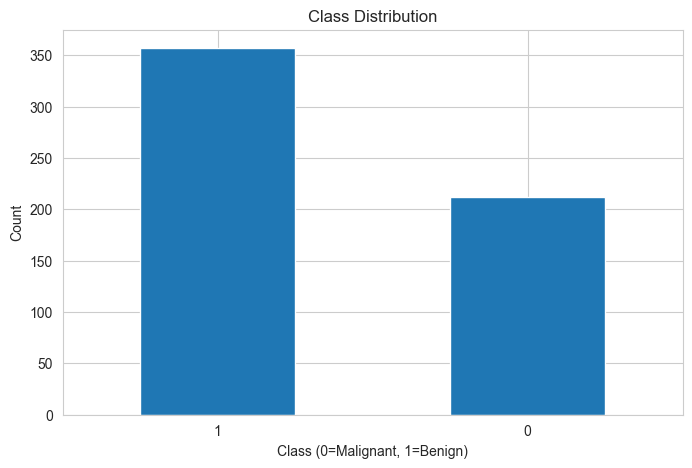

In [3]:
# Dataset statistics
print("Dataset Information:")
print(f"Total samples: {len(df)}")
print(f"Number of features: {X.shape[1]}")
print(f"\nClass distribution:")
print(df['target'].value_counts())
print(f"\nClass balance:")
print(df['target'].value_counts(normalize=True))

# Visualize class distribution
plt.figure(figsize=(8, 5))
df['target'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class (0=Malignant, 1=Benign)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Data Preparation

Split the data into training and testing sets, and standardize the features for better performance with linear models.

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features (important for gradient descent and regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train_scaled.shape}")
print(f"Test set size: {X_test_scaled.shape}")
print(f"\nFeature scaling completed!")
print(f"Mean of scaled features: {X_train_scaled.mean():.6f}")
print(f"Std of scaled features: {X_train_scaled.std():.6f}")

Training set size: (455, 30)
Test set size: (114, 30)

Feature scaling completed!
Mean of scaled features: -0.000000
Std of scaled features: 1.000000


---

# Part 1: Optimizing and Training Linear Models

## 1.1 Understanding Gradient Descent Optimization

Gradient descent is an optimization algorithm used to minimize the cost function. It iteratively updates parameters in the direction of steepest descent.

**Key Concepts:**
- **Batch Gradient Descent**: Uses all training samples to compute gradients
- **Stochastic Gradient Descent (SGD)**: Uses one sample at a time
- **Mini-batch Gradient Descent**: Uses small batches of samples

We'll use `SGDClassifier` which implements stochastic gradient descent with various loss functions.

In [7]:
# Train a model using Stochastic Gradient Descent
sgd_clf = SGDClassifier(
    loss='log_loss',  # Logistic regression loss
    penalty=None,   # No regularization for now
    max_iter=1000,
    learning_rate='optimal',
    random_state=42
)

sgd_clf.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_clf.predict(X_test_scaled)

print("SGD Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_sgd):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_sgd):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_sgd):.4f}")

SGD Classifier Performance:
Accuracy: 0.9912
Precision: 0.9863
Recall: 1.0000
F1-Score: 0.9931



Comparison of Learning Rate Schedules:
  Learning Rate  Accuracy
0      constant  0.947368
1       optimal  0.973684
2    invscaling  0.964912
3      adaptive  0.973684


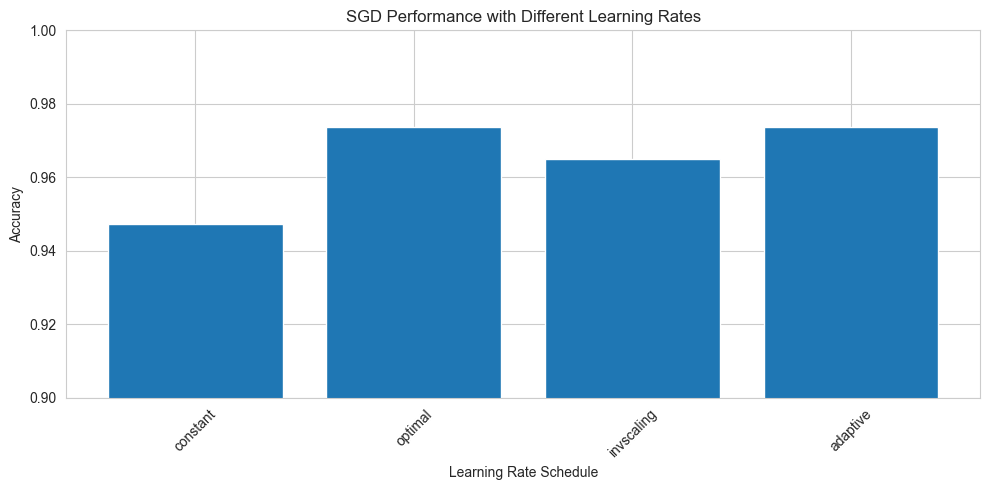

In [10]:
# Compare different learning rates
learning_rates = ['constant', 'optimal', 'invscaling', 'adaptive']
results = []

for lr in learning_rates:
    sgd = SGDClassifier(
        loss='log_loss',
        learning_rate=lr,
        max_iter=1000,
        random_state=42,
        eta0=1
    )
    sgd.fit(X_train_scaled, y_train)
    y_pred = sgd.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Learning Rate': lr, 'Accuracy': acc})

results_df = pd.DataFrame(results)
print("\nComparison of Learning Rate Schedules:")
print(results_df)

# Visualize
plt.figure(figsize=(10, 5))
plt.bar(results_df['Learning Rate'], results_df['Accuracy'])
plt.title('SGD Performance with Different Learning Rates')
plt.xlabel('Learning Rate Schedule')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.0])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 1.2 L1 and L2/ElasticNet Regularization

Regularization helps prevent overfitting by adding a penalty term to the cost function:

- **L1 Regularization (Lasso)**: Adds sum of absolute values of coefficients. Promotes sparsity (feature selection).
- **L2 Regularization (Ridge)**: Adds sum of squared coefficients. Shrinks coefficients smoothly.
- **ElasticNet**: Combines L1 and L2 penalties.

**Cost Function:**
- L1: $J(\theta) = MSE(\theta) + \alpha \sum |\theta_i|$
- L2: $J(\theta) = MSE(\theta) + \alpha \sum \theta_i^2$
- ElasticNet: $J(\theta) = MSE(\theta) + r\alpha \sum |\theta_i| + \frac{1-r}{2}\alpha \sum \theta_i^2$

In [11]:
# Compare models with different regularization
models = {
    'No Regularization': LogisticRegression(penalty=None, max_iter=1000, random_state=42),
    'L1 (Lasso)': LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=1000, random_state=42),
    'L2 (Ridge)': LogisticRegression(penalty='l2', C=1.0, max_iter=1000, random_state=42),
    'ElasticNet': LogisticRegression(penalty='elasticnet', C=1.0, l1_ratio=0.5, solver='saga', max_iter=1000, random_state=42)
}

regularization_results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Count non-zero coefficients (for feature selection)
    non_zero_coefs = np.sum(np.abs(model.coef_) > 0.01)
    
    regularization_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Non-zero Coefs': non_zero_coefs
    })

reg_df = pd.DataFrame(regularization_results)
print("Regularization Comparison:")
print(reg_df)

Regularization Comparison:
               Model  Accuracy  F1-Score  Non-zero Coefs
0  No Regularization  0.921053  0.935252              30
1         L1 (Lasso)  0.991228  0.993103              16
2         L2 (Ridge)  0.982456  0.986111              30
3         ElasticNet  0.982456  0.986111              25


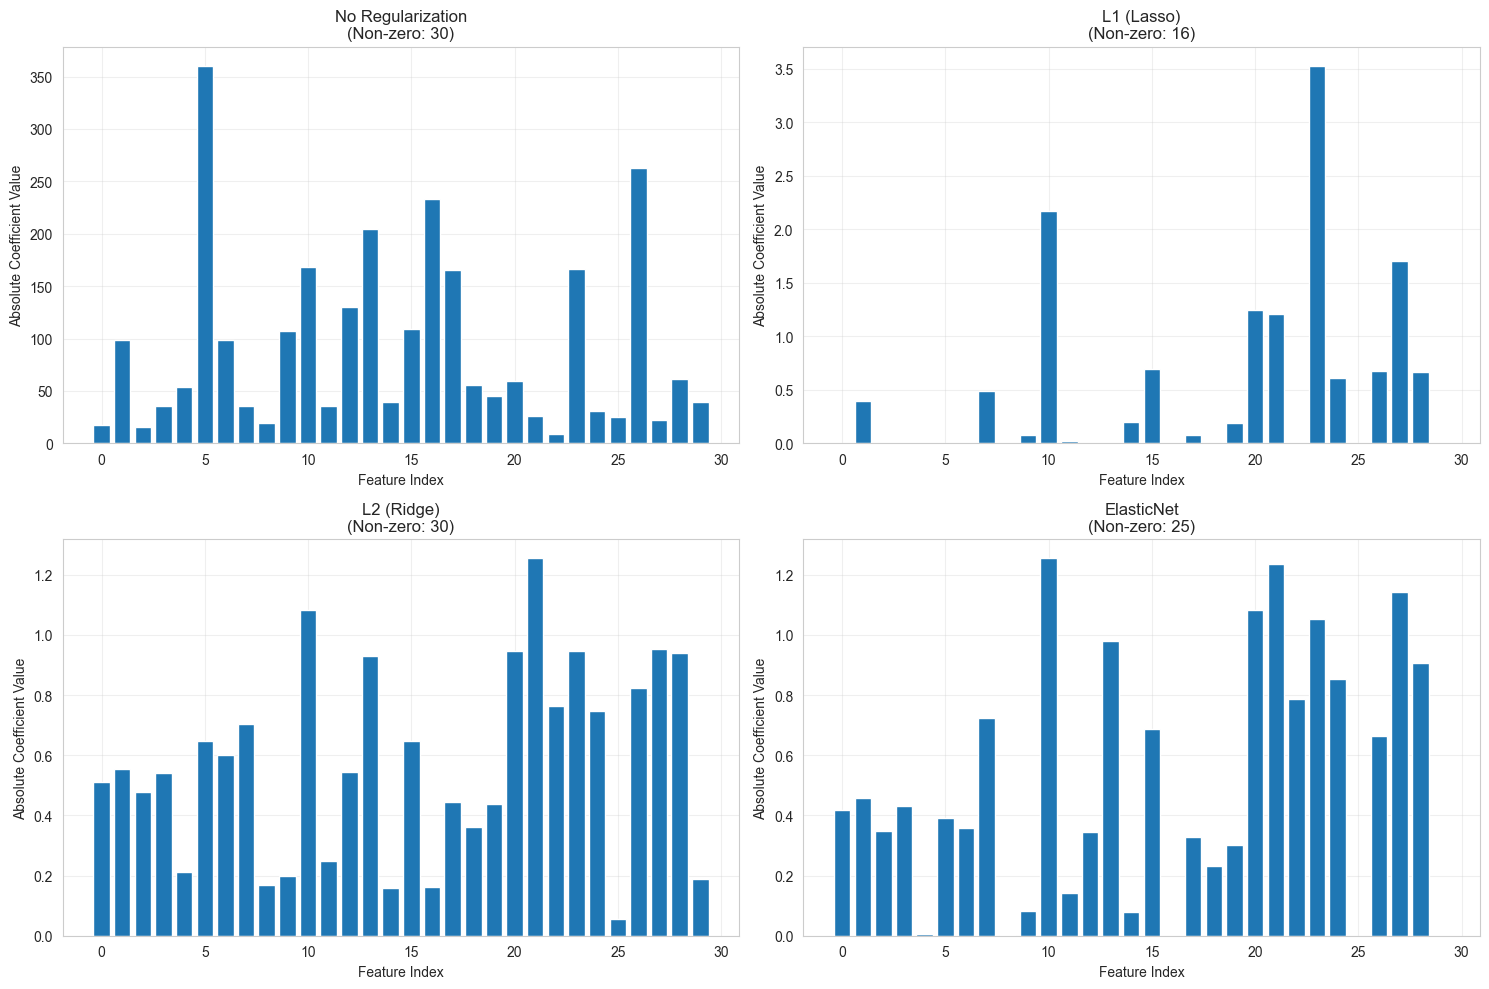


Note: L1 regularization produces sparser models (more zero coefficients) suitable for feature selection.


In [12]:
# Visualize coefficient magnitudes for different regularization methods
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    coefs = model.coef_[0]
    axes[idx].bar(range(len(coefs)), np.abs(coefs))
    axes[idx].set_title(f'{name}\n(Non-zero: {np.sum(np.abs(coefs) > 0.01)})')
    axes[idx].set_xlabel('Feature Index')
    axes[idx].set_ylabel('Absolute Coefficient Value')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNote: L1 regularization produces sparser models (more zero coefficients) suitable for feature selection.")

## 1.3 Support Vector Machines (SVM)

SVMs find the optimal hyperplane that maximizes the margin between classes. They can handle non-linear decision boundaries using the kernel trick.

**Key Hyperparameters:**
- **C**: Regularization parameter (smaller C = more regularization)
- **kernel**: Linear, polynomial, RBF (Radial Basis Function), sigmoid
- **gamma**: Kernel coefficient for RBF, poly, sigmoid

In [13]:
# Train SVM with different kernels
svm_kernels = ['linear', 'rbf', 'poly', 'sigmoid']
svm_results = []

for kernel in svm_kernels:
    svm = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    
    svm_results.append({
        'Kernel': kernel,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

svm_df = pd.DataFrame(svm_results)
print("SVM Performance with Different Kernels:")
print(svm_df)

SVM Performance with Different Kernels:
    Kernel  Accuracy  Precision    Recall  F1-Score
0   linear  0.973684   0.985915  0.972222  0.979021
1      rbf  0.982456   0.986111  0.986111  0.986111
2     poly  0.912281   0.878049  1.000000  0.935065
3  sigmoid  0.929825   0.957143  0.930556  0.943662


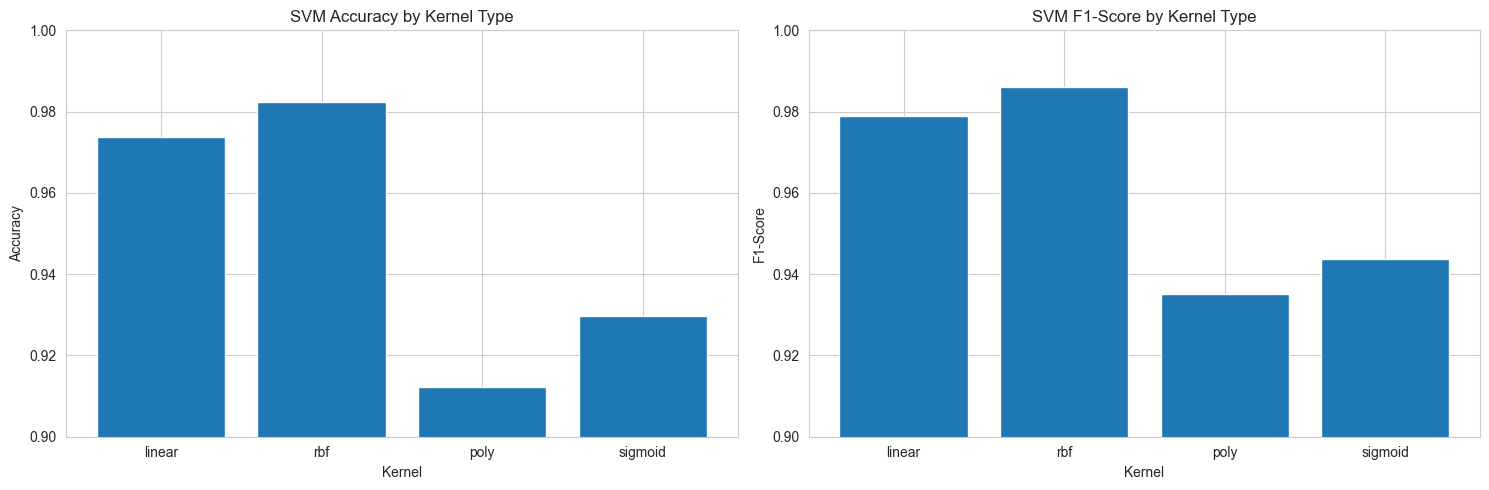

In [14]:
# Visualize SVM kernel comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
axes[0].bar(svm_df['Kernel'], svm_df['Accuracy'])
axes[0].set_title('SVM Accuracy by Kernel Type')
axes[0].set_xlabel('Kernel')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.9, 1.0])

# F1-Score comparison
axes[1].bar(svm_df['Kernel'], svm_df['F1-Score'])
axes[1].set_title('SVM F1-Score by Kernel Type')
axes[1].set_xlabel('Kernel')
axes[1].set_ylabel('F1-Score')
axes[1].set_ylim([0.9, 1.0])

plt.tight_layout()
plt.show()

## 1.4 k-Folds Cross Validation

Cross-validation provides a more robust estimate of model performance by:
1. Splitting data into k folds
2. Training on k-1 folds and validating on the remaining fold
3. Repeating k times with different validation folds
4. Averaging the results

This helps detect overfitting and provides more reliable performance estimates.

In [15]:
# Perform k-fold cross-validation
k_values = [3, 5, 10]
model_for_cv = LogisticRegression(penalty='l2', C=1.0, max_iter=1000, random_state=42)

cv_results = []

for k in k_values:
    scores = cross_val_score(
        model_for_cv, X_train_scaled, y_train, 
        cv=k, scoring='accuracy'
    )
    
    cv_results.append({
        'k': k,
        'Mean Accuracy': scores.mean(),
        'Std Accuracy': scores.std(),
        'Min Accuracy': scores.min(),
        'Max Accuracy': scores.max()
    })

cv_df = pd.DataFrame(cv_results)
print("Cross-Validation Results:")
print(cv_df)

Cross-Validation Results:
    k  Mean Accuracy  Std Accuracy  Min Accuracy  Max Accuracy
0   3       0.980249      0.010726      0.967105      0.993377
1   5       0.980220      0.012815      0.967033      1.000000
2  10       0.984734      0.025826      0.934783      1.000000



5-Fold Cross-Validation Model Comparison:
                 Model   CV Mean    CV Std
0  Logistic Regression  0.971429  0.023671
1       SGD Classifier  0.971429  0.017855
2           Linear SVM  0.958242  0.028146
3              RBF SVM  0.973626  0.026556


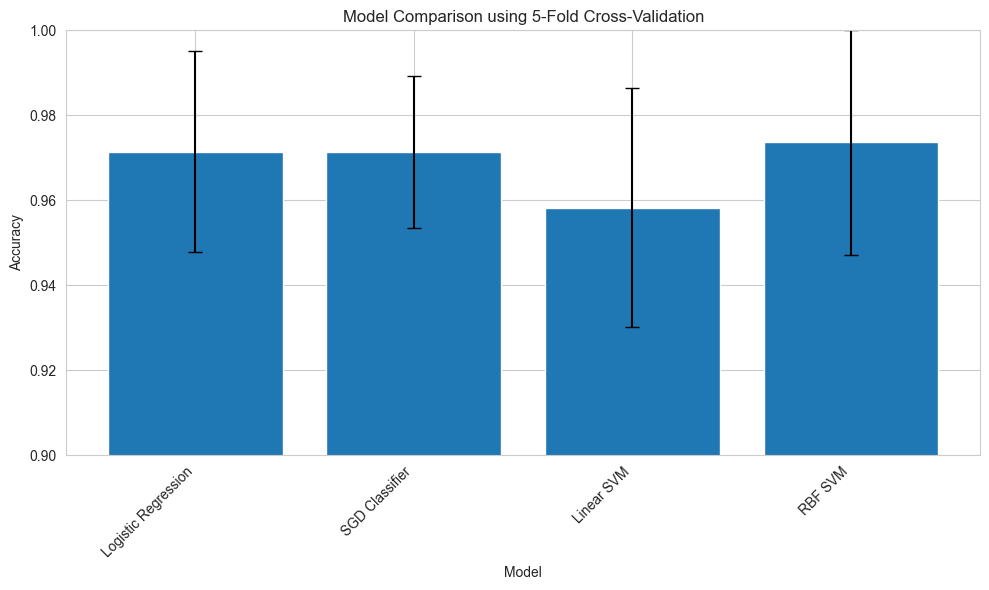

In [16]:
# Compare multiple models using cross-validation
models_cv = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SGD Classifier': SGDClassifier(loss='log_loss', max_iter=1000, random_state=42),
    'Linear SVM': SVC(kernel='linear', random_state=42),
    'RBF SVM': SVC(kernel='rbf', random_state=42)
}

cv_comparison = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models_cv.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    cv_comparison.append({
        'Model': name,
        'CV Mean': scores.mean(),
        'CV Std': scores.std()
    })

cv_comp_df = pd.DataFrame(cv_comparison)
print("\n5-Fold Cross-Validation Model Comparison:")
print(cv_comp_df)

# Visualize
plt.figure(figsize=(10, 6))
plt.bar(cv_comp_df['Model'], cv_comp_df['CV Mean'], yerr=cv_comp_df['CV Std'], capsize=5)
plt.title('Model Comparison using 5-Fold Cross-Validation')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim([0.9, 1.0])
plt.tight_layout()
plt.show()

---

# Part 2: Evaluating Models

## 2.1 Metrics for Model Evaluation

Different metrics provide different perspectives on model performance:

- **Accuracy**: Overall correctness (can be misleading with imbalanced data)
- **Precision**: Of predicted positives, how many are actually positive?
- **Recall (Sensitivity)**: Of actual positives, how many did we catch?
- **F1-Score**: Harmonic mean of precision and recall
- **Confusion Matrix**: Detailed breakdown of predictions

In [17]:
# Train a baseline model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train_scaled, y_train)
y_pred = baseline_model.predict(X_test_scaled)
y_pred_proba = baseline_model.predict_proba(X_test_scaled)[:, 1]

# Calculate comprehensive metrics
print("Comprehensive Model Evaluation:")
print("="*50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))

Comprehensive Model Evaluation:
Accuracy:  0.9825
Precision: 0.9861
Recall:    0.9861
F1-Score:  0.9861
ROC-AUC:   0.9954

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



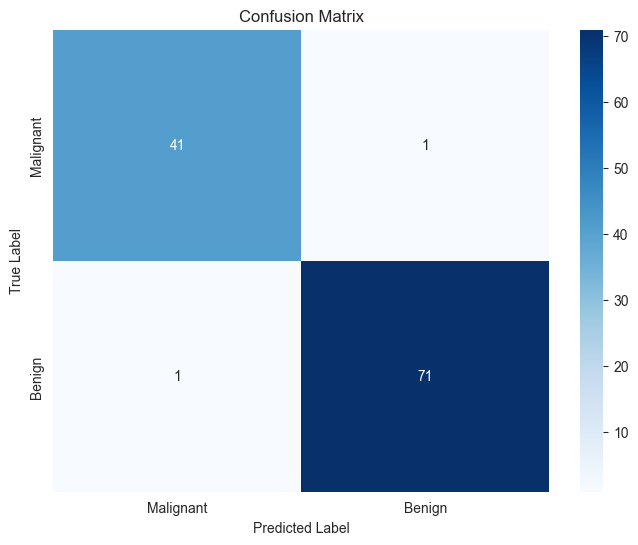


Confusion Matrix Interpretation:
True Negatives (TN):  41 - Correctly identified malignant
False Positives (FP): 1 - Malignant predicted as benign (Type I error)
False Negatives (FN): 1 - Benign predicted as malignant (Type II error)
True Positives (TP):  71 - Correctly identified benign


In [18]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nConfusion Matrix Interpretation:")
print(f"True Negatives (TN):  {cm[0, 0]} - Correctly identified malignant")
print(f"False Positives (FP): {cm[0, 1]} - Malignant predicted as benign (Type I error)")
print(f"False Negatives (FN): {cm[1, 0]} - Benign predicted as malignant (Type II error)")
print(f"True Positives (TP):  {cm[1, 1]} - Correctly identified benign")

## 2.2 Hyperparameter Tuning

Grid Search and Randomized Search systematically explore the hyperparameter space to find optimal configurations.

**Grid Search**: Tests all combinations of specified parameter values.
**Randomized Search**: Samples random combinations (more efficient for large spaces).

In [19]:
# Grid Search for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Grid Search Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV F1-Score: {grid_search.best_score_:.4f}")

# Test the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print(f"\nTest Set Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_best):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_best):.4f}")

Grid Search Results:
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV F1-Score: 0.9843

Test Set Performance:
Accuracy:  0.9825
F1-Score:  0.9861


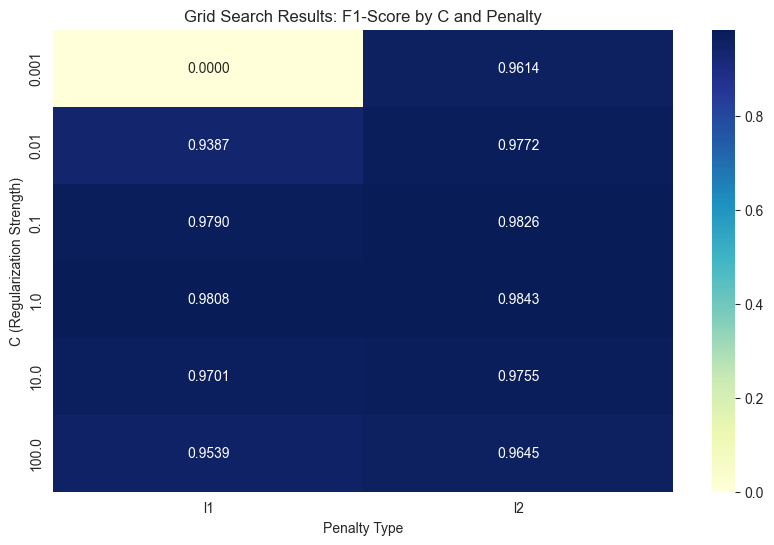

In [20]:
# Visualize hyperparameter tuning results
results_df = pd.DataFrame(grid_search.cv_results_)

# Create a pivot table for visualization
pivot_data = results_df.pivot_table(
    values='mean_test_score',
    index='param_C',
    columns='param_penalty'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, fmt='.4f', cmap='YlGnBu')
plt.title('Grid Search Results: F1-Score by C and Penalty')
plt.xlabel('Penalty Type')
plt.ylabel('C (Regularization Strength)')
plt.show()

## 2.3 Adjusting Thresholds for Business Needs

The default classification threshold is 0.5, but we can adjust it based on business requirements:

- **Higher threshold** (e.g., 0.7): More conservative, higher precision, lower recall
- **Lower threshold** (e.g., 0.3): More aggressive, lower precision, higher recall

In medical diagnosis, we might prefer high recall (catch all positive cases) even if it means more false positives.

In [21]:
# Get prediction probabilities
y_pred_proba = baseline_model.predict_proba(X_test_scaled)[:, 1]

# Test different thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
threshold_results = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    
    threshold_results.append({
        'Threshold': threshold,
        'Accuracy': accuracy_score(y_test, y_pred_threshold),
        'Precision': precision_score(y_test, y_pred_threshold),
        'Recall': recall_score(y_test, y_pred_threshold),
        'F1-Score': f1_score(y_test, y_pred_threshold)
    })

threshold_df = pd.DataFrame(threshold_results)
print("Performance at Different Thresholds:")
print(threshold_df)

Performance at Different Thresholds:
   Threshold  Accuracy  Precision    Recall  F1-Score
0        0.3  0.982456   0.972973  1.000000  0.986301
1        0.4  0.982456   0.986111  0.986111  0.986111
2        0.5  0.982456   0.986111  0.986111  0.986111
3        0.6  0.956140   0.985507  0.944444  0.964539
4        0.7  0.947368   0.985294  0.930556  0.957143
5        0.8  0.938596   0.985075  0.916667  0.949640


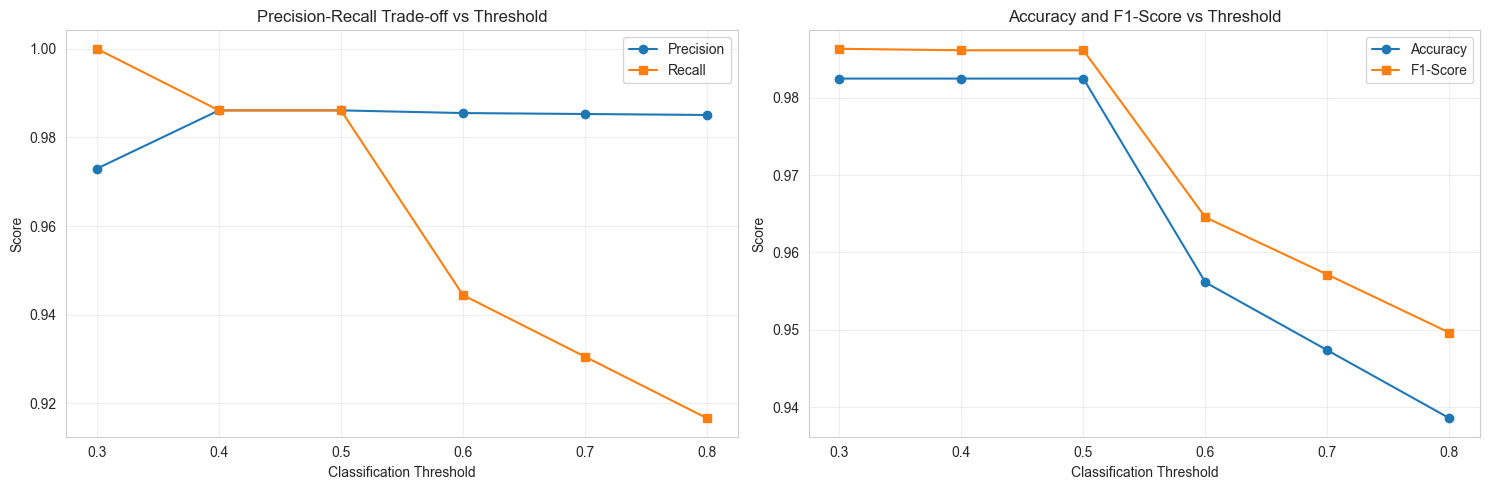

In [22]:
# Visualize threshold impact
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Precision and Recall
axes[0].plot(threshold_df['Threshold'], threshold_df['Precision'], marker='o', label='Precision')
axes[0].plot(threshold_df['Threshold'], threshold_df['Recall'], marker='s', label='Recall')
axes[0].set_xlabel('Classification Threshold')
axes[0].set_ylabel('Score')
axes[0].set_title('Precision-Recall Trade-off vs Threshold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy and F1
axes[1].plot(threshold_df['Threshold'], threshold_df['Accuracy'], marker='o', label='Accuracy')
axes[1].plot(threshold_df['Threshold'], threshold_df['F1-Score'], marker='s', label='F1-Score')
axes[1].set_xlabel('Classification Threshold')
axes[1].set_ylabel('Score')
axes[1].set_title('Accuracy and F1-Score vs Threshold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2.4 Handling Class Imbalance

Class imbalance can bias models toward the majority class. Strategies include:

1. **Class Weights**: Penalize misclassification of minority class more
2. **Oversampling**: SMOTE (Synthetic Minority Oversampling Technique)
3. **Undersampling**: Reduce majority class samples

Let's create an imbalanced version of our dataset and demonstrate these techniques.

In [23]:
# Create an imbalanced dataset by removing some benign samples
# Keep all malignant (0) and only 30% of benign (1)
np.random.seed(42)
malignant_idx = np.where(y_train == 0)[0]
benign_idx = np.where(y_train == 1)[0]
benign_sample_idx = np.random.choice(benign_idx, size=int(len(benign_idx) * 0.3), replace=False)

imbalanced_idx = np.concatenate([malignant_idx, benign_sample_idx])
X_train_imb = X_train_scaled[imbalanced_idx]
y_train_imb = y_train[imbalanced_idx]

print("Imbalanced Dataset Class Distribution:")
print(pd.Series(y_train_imb).value_counts())
print("\nClass Balance:")
print(pd.Series(y_train_imb).value_counts(normalize=True))

Imbalanced Dataset Class Distribution:
0    170
1     85
Name: count, dtype: int64

Class Balance:
0    0.666667
1    0.333333
Name: proportion, dtype: float64


In [24]:
# Strategy 1: No handling (baseline)
model_no_handling = LogisticRegression(max_iter=1000, random_state=42)
model_no_handling.fit(X_train_imb, y_train_imb)
y_pred_no = model_no_handling.predict(X_test_scaled)

# Strategy 2: Class weights
model_weights = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_weights.fit(X_train_imb, y_train_imb)
y_pred_weights = model_weights.predict(X_test_scaled)

# Strategy 3: SMOTE (Oversampling)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imb, y_train_imb)
model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test_scaled)

# Strategy 4: Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_imb, y_train_imb)
model_under = LogisticRegression(max_iter=1000, random_state=42)
model_under.fit(X_train_under, y_train_under)
y_pred_under = model_under.predict(X_test_scaled)

# Compare strategies
imbalance_results = [
    {'Strategy': 'No Handling', 'Accuracy': accuracy_score(y_test, y_pred_no),
     'Precision': precision_score(y_test, y_pred_no), 'Recall': recall_score(y_test, y_pred_no),
     'F1-Score': f1_score(y_test, y_pred_no)},
    {'Strategy': 'Class Weights', 'Accuracy': accuracy_score(y_test, y_pred_weights),
     'Precision': precision_score(y_test, y_pred_weights), 'Recall': recall_score(y_test, y_pred_weights),
     'F1-Score': f1_score(y_test, y_pred_weights)},
    {'Strategy': 'SMOTE', 'Accuracy': accuracy_score(y_test, y_pred_smote),
     'Precision': precision_score(y_test, y_pred_smote), 'Recall': recall_score(y_test, y_pred_smote),
     'F1-Score': f1_score(y_test, y_pred_smote)},
    {'Strategy': 'Undersampling', 'Accuracy': accuracy_score(y_test, y_pred_under),
     'Precision': precision_score(y_test, y_pred_under), 'Recall': recall_score(y_test, y_pred_under),
     'F1-Score': f1_score(y_test, y_pred_under)}
]

imbalance_df = pd.DataFrame(imbalance_results)
print("\nClass Imbalance Handling Strategies Comparison:")
print(imbalance_df)


Class Imbalance Handling Strategies Comparison:
        Strategy  Accuracy  Precision    Recall  F1-Score
0    No Handling  0.938596   0.985075  0.916667  0.949640
1  Class Weights  0.956140   0.985507  0.944444  0.964539
2          SMOTE  0.964912   0.985714  0.958333  0.971831
3  Undersampling  0.956140   0.985507  0.944444  0.964539


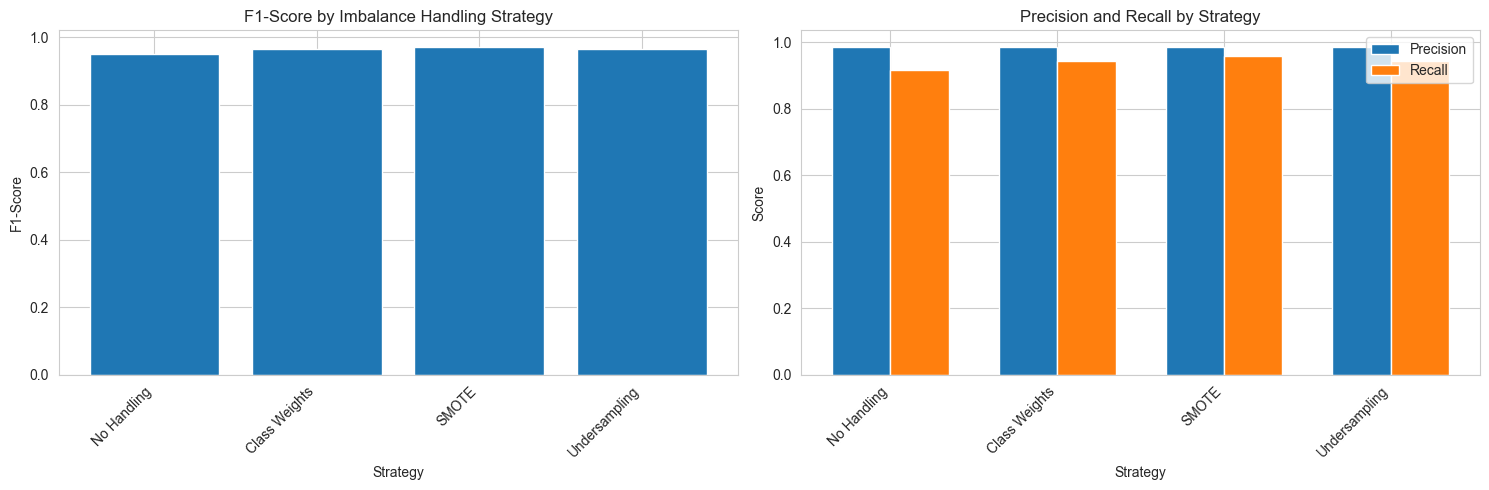

In [25]:
# Visualize imbalance handling comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# F1-Score comparison
axes[0].bar(imbalance_df['Strategy'], imbalance_df['F1-Score'])
axes[0].set_title('F1-Score by Imbalance Handling Strategy')
axes[0].set_xlabel('Strategy')
axes[0].set_ylabel('F1-Score')
axes[0].set_xticklabels(imbalance_df['Strategy'], rotation=45, ha='right')

# Precision-Recall comparison
x = np.arange(len(imbalance_df))
width = 0.35
axes[1].bar(x - width/2, imbalance_df['Precision'], width, label='Precision')
axes[1].bar(x + width/2, imbalance_df['Recall'], width, label='Recall')
axes[1].set_title('Precision and Recall by Strategy')
axes[1].set_xlabel('Strategy')
axes[1].set_ylabel('Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(imbalance_df['Strategy'], rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.show()

## 2.5 Advanced Metrics for Model Evaluation

Beyond basic metrics, we can use:

- **ROC Curve**: Receiver Operating Characteristic - plots True Positive Rate vs False Positive Rate
- **ROC-AUC Score**: Area Under the ROC Curve (1.0 = perfect, 0.5 = random)
- **Precision-Recall Curve**: Especially useful for imbalanced datasets
- **Average Precision (AP)**: Area under the Precision-Recall curve

In [26]:
# Calculate ROC curve and AUC
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
avg_precision = average_precision_score(y_test, y_pred_proba)

print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"PR-AUC Score: {pr_auc:.4f}")
print(f"Average Precision: {avg_precision:.4f}")

ROC-AUC Score: 0.9957
PR-AUC Score: 0.9973
Average Precision: 0.9973


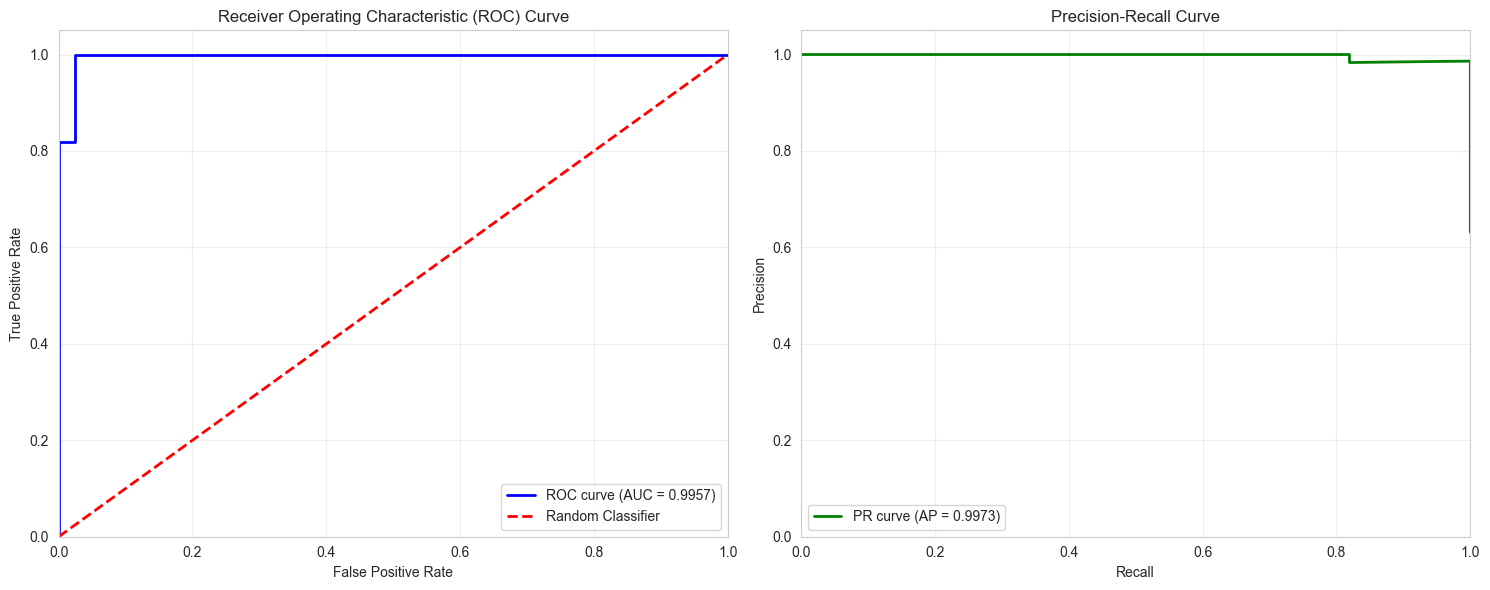

In [27]:
# Plot ROC and Precision-Recall curves
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ROC Curve
axes[0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
axes[0].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Precision-Recall Curve
axes[1].plot(recall, precision, color='green', lw=2, label=f'PR curve (AP = {avg_precision:.4f})')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc='lower left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary and Key Takeaways

In this comprehensive lab, we covered:

### Part 1: Model Optimization
1. **Gradient Descent**: Compared different learning rate schedules and their impact on convergence
2. **Regularization**: Explored L1, L2, and ElasticNet for feature selection and preventing overfitting
3. **SVMs**: Tested various kernels (linear, RBF, polynomial, sigmoid) for classification
4. **Cross-Validation**: Used k-fold CV for robust model evaluation

### Part 2: Model Evaluation
5. **Metrics**: Calculated accuracy, precision, recall, F1-score, and confusion matrix
6. **Hyperparameter Tuning**: Used GridSearchCV to find optimal parameters
7. **Threshold Tuning**: Adjusted decision thresholds for different business requirements
8. **Class Imbalance**: Compared class weights, SMOTE, and undersampling strategies
9. **Advanced Metrics**: Analyzed ROC curves, PR curves, and AUC scores

### Best Practices
- Always standardize features for linear models
- Use cross-validation for reliable performance estimates
- Consider the business context when choosing metrics and thresholds
- Handle class imbalance appropriately for your use case
- Visualize results to gain insights

### Real-World Application
The Breast Cancer Wisconsin dataset demonstrates real medical diagnosis challenges where:
- False negatives (missing cancer) are more costly than false positives
- High recall is often prioritized even at the cost of precision
- ROC-AUC and PR-AUC provide better evaluation than accuracy alone

In [28]:
# Final model recommendation based on all analyses
print("="*70)
print("FINAL MODEL RECOMMENDATION")
print("="*70)
print(f"\nBest Model: {grid_search.best_estimator_}")
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"\nTest Set Performance:")
y_final_pred = best_model.predict(X_test_scaled)
y_final_proba = best_model.predict_proba(X_test_scaled)[:, 1]
print(f"  Accuracy:  {accuracy_score(y_test, y_final_pred):.4f}")
print(f"  Precision: {precision_score(y_test, y_final_pred):.4f}")
print(f"  Recall:    {recall_score(y_test, y_final_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_final_pred):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_final_proba):.4f}")
print("\n" + "="*70)
print("This model balances high accuracy with good recall for medical diagnosis.")
print("="*70)

FINAL MODEL RECOMMENDATION

Best Model: LogisticRegression(C=1, max_iter=1000, random_state=42, solver='liblinear')

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Test Set Performance:
  Accuracy:  0.9825
  Precision: 0.9861
  Recall:    0.9861
  F1-Score:  0.9861
  ROC-AUC:   0.9957

This model balances high accuracy with good recall for medical diagnosis.
